# Import library

In [1]:
!pip install aif360


You should consider upgrading via the 'C:\Users\natna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Import Support Vector Machine Classification models
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# Load all necessary packages
import sys
sys.path.insert(1, "../")  

import numpy as np
np.random.seed(0)

from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing

from IPython.display import Markdown, display

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [3]:
# Import Support Vector Machine Classification models
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score,classification_report,mean_squared_error

# Import dataset

In [4]:
df = pd.read_csv("diabetes1.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Data Information

In [5]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627

Raw data

         Outcome      Ratio
Outcome                    
0            500  65.104167
1            268  34.895833
##########################################


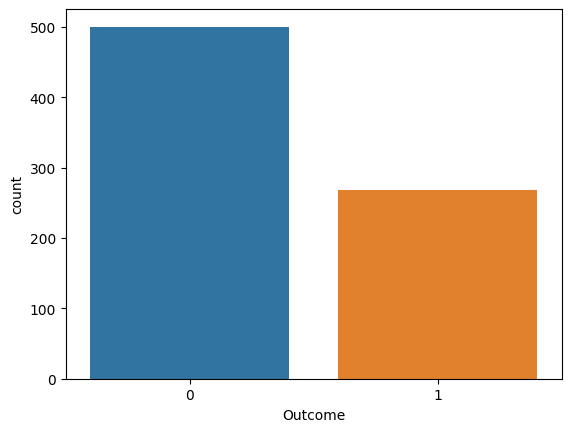

In [6]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        #plt.show(block=True)
cat_summary(df, "Outcome", plot=True)

# Data cleaning

In [7]:
df2 = df.loc[df["Glucose"] != 0]
df3 = df.loc[df["BloodPressure"] != 0 ]
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               733 non-null    int64  
 1   Glucose                   733 non-null    int64  
 2   BloodPressure             733 non-null    int64  
 3   SkinThickness             733 non-null    int64  
 4   Insulin                   733 non-null    int64  
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  733 non-null    float64
 7   Age                       733 non-null    int64  
 8   Outcome                   733 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 57.3 KB


Outcome (Target class)

         Outcome      Ratio
Outcome                    
0            481  65.620737
1            252  34.379263
##########################################


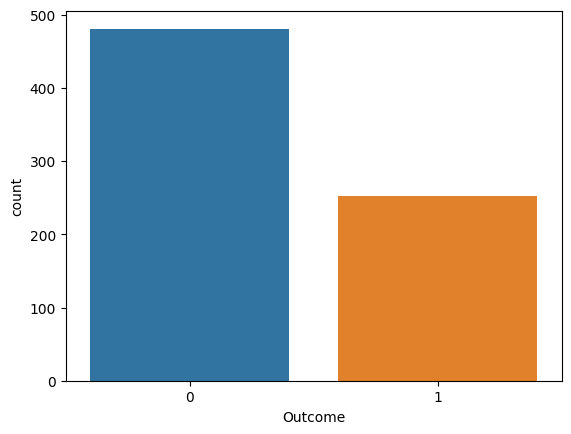

In [9]:
cat_summary(df3, "Outcome", plot=True)

Heatmap correlation

Text(0.5, 1.0, 'Correlation Between Features')

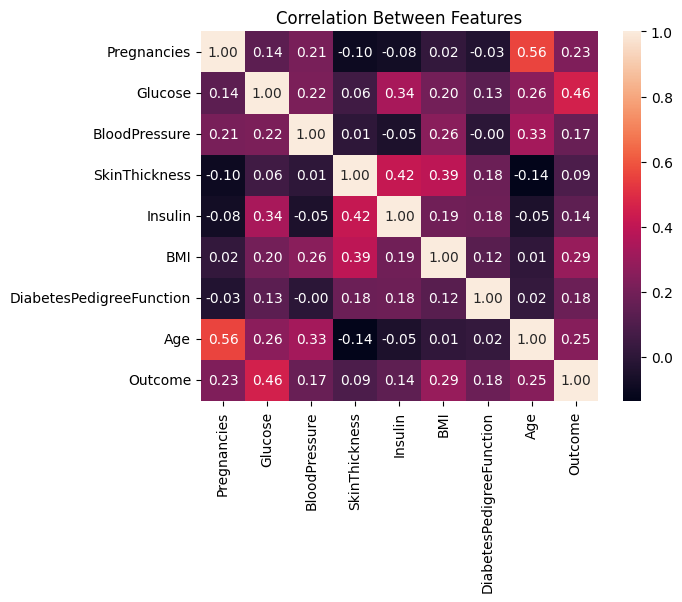

In [10]:
corr = df3.corr()

sns.heatmap(corr,
         xticklabels=corr.columns,
         yticklabels=corr.columns,annot = True, fmt = ".2f")

plt.title("Correlation Between Features")

Outliers

C:\Users\natna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\natna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\natna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\natna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-pa

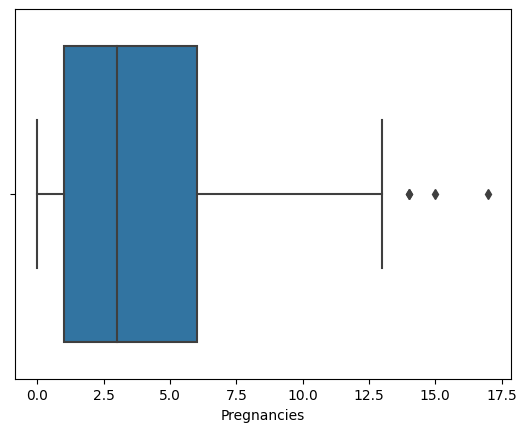

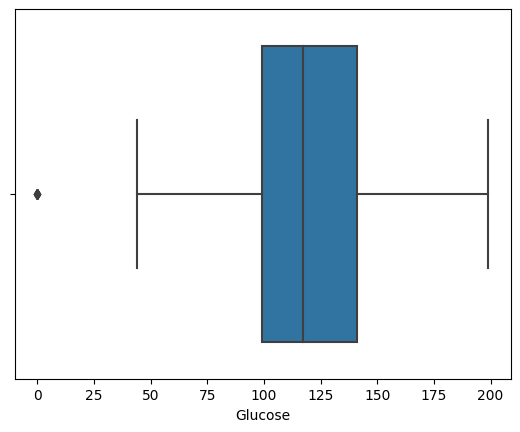

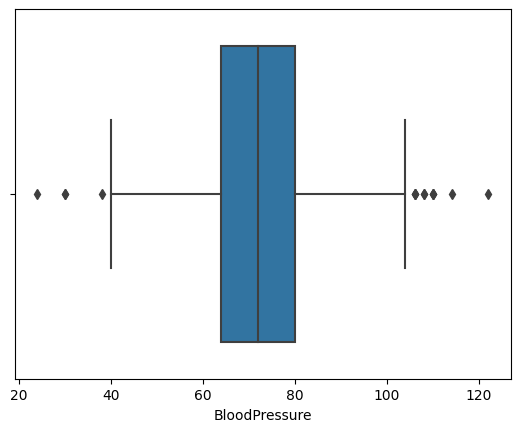

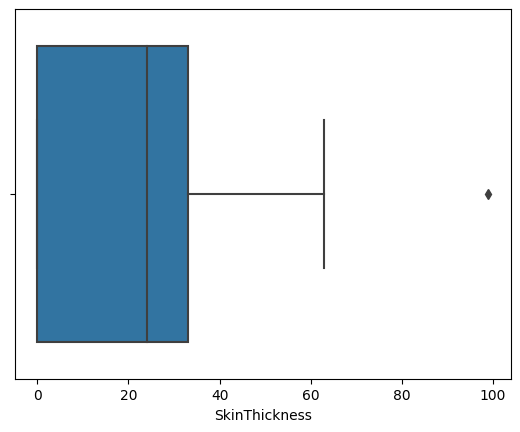

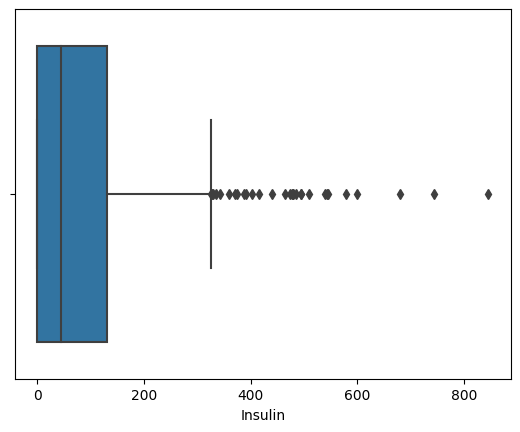

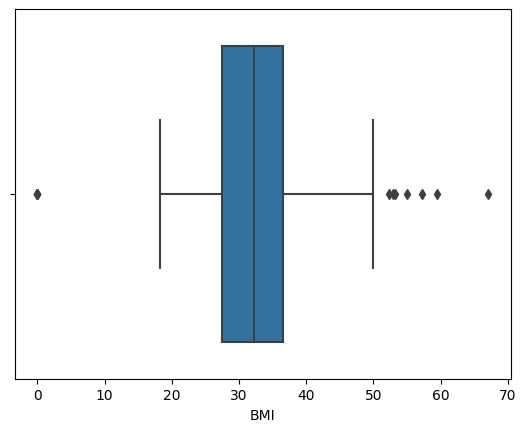

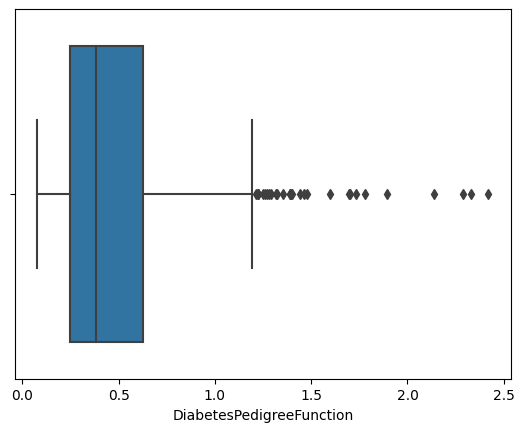

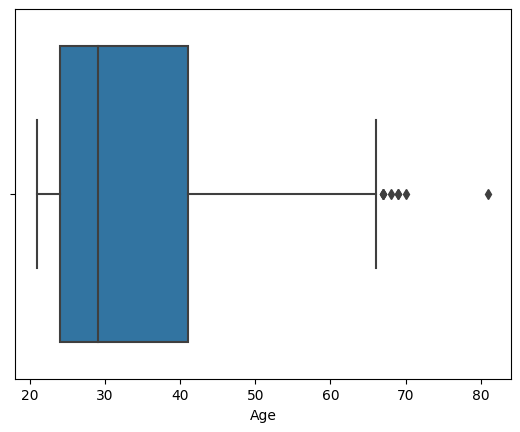

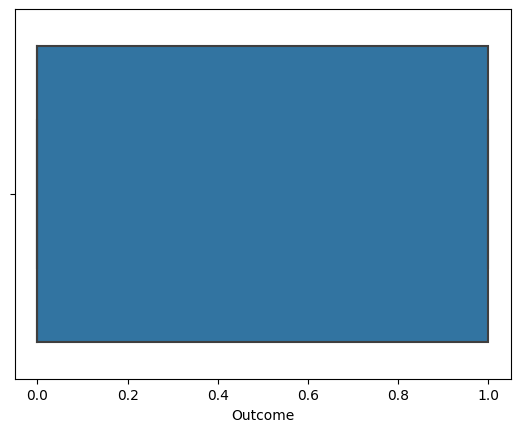

In [11]:
for c in df3.columns:
    plt.figure()
    sns.boxplot(x = c, data = df3, orient = "v")

# Detecting and mitigating glucose bias on diabetes decision

In [12]:
df4 = df3.copy()
df3['Glucose_category'] = np.where(df3['Glucose'] > 100, 1, 0)

C:\Users\natna\AppData\Local\Temp\ipykernel_20820\2988074106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Glucose_category'] = np.where(df3['Glucose'] > 100, 1, 0)


In [13]:
dataset = BinaryLabelDataset(df=df3, label_names=['Outcome'], 
                             protected_attribute_names=['Glucose_category'])

In [44]:
unprivileged_groups = [{'Glucose_category': 0}]
privileged_groups = [{'Glucose_category': 1}]

#Define BinaryLabelDatasetMetric
metric = BinaryLabelDatasetMetric(dataset, 
                                  unprivileged_groups=unprivileged_groups,
                                  privileged_groups=privileged_groups)

#Calculate Mean Difference
mean_diff = metric.mean_difference()
print("Mean Difference (Statistical Parity Difference):", mean_diff)

Mean Difference (Statistical Parity Difference): -0.34473532098972615


In [ ]:
# Mitigate bias using reweighing
rw = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
train_reweighted = rw.fit_transform(train)

# Compute metrics after reweighing
metric_reweighted = BinaryLabelDatasetMetric(train_reweighted, privileged_groups=privileged_group, unprivileged_groups=unprivileged_group)
print("Dataset after reweighing: ")
print(f"Disparate Impact: {metric_reweighted.disparate_impact()}")
print(f"Mean Difference: {metric_reweighted.mean_difference()}")


# Preparing Non-sampling - NS dataset.

In [15]:
df_out_1_glu_more_100_NS = df4[(df4['Outcome']==1) & (df4['Glucose']>100)]
df_out_1_glu_more_100_NS

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [16]:
df_out_0_glu_more_100_NS = df4[(df4['Outcome']==0) & (df4['Glucose']>100)]
df_out_0_glu_more_100_NS

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,5,116,74,0,0,25.6,0.201,30,0
10,4,110,92,0,0,37.6,0.191,30,0
12,10,139,80,0,0,27.1,1.441,57,0
18,1,103,30,38,83,43.3,0.183,33,0
20,3,126,88,41,235,39.3,0.704,27,0
...,...,...,...,...,...,...,...,...,...
756,7,137,90,41,0,32.0,0.391,39,0
758,1,106,76,0,0,37.5,0.197,26,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0


In [17]:
df5_NS = pd.concat([df_out_1_glu_more_100_NS, df_out_0_glu_more_100_NS])
df5_NS

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
...,...,...,...,...,...,...,...,...,...
756,7,137,90,41,0,32.0,0.391,39,0
758,1,106,76,0,0,37.5,0.197,26,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0


In [48]:
df5_NS.keys

<bound method NDFrame.keys of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
2              8      183             64              0        0  23.3   
4              0      137             40             35      168  43.1   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
..           ...      ...            ...            ...      ...   ...   
756            7      137             90             41        0  32.0   
758            1      106             76              0        0  37.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [18]:
X_NS = df5_NS.drop(['Outcome'], axis = 1).values
X_NS

array([[6.000e+00, 1.480e+02, 7.200e+01, ..., 3.360e+01, 6.270e-01,
        5.000e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, ..., 2.330e+01, 6.720e-01,
        3.200e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, ..., 4.310e+01, 2.288e+00,
        3.300e+01],
       ...,
       [1.000e+01, 1.010e+02, 7.600e+01, ..., 3.290e+01, 1.710e-01,
        6.300e+01],
       [2.000e+00, 1.220e+02, 7.000e+01, ..., 3.680e+01, 3.400e-01,
        2.700e+01],
       [5.000e+00, 1.210e+02, 7.200e+01, ..., 2.620e+01, 2.450e-01,
        3.000e+01]])

In [19]:
y_NS = df5_NS['Outcome'].values
y_NS

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
print(df_out_1_glu_more_100_NS.shape)
print(df_out_0_glu_more_100_NS.shape)


(233, 9)
(298, 9)


In [21]:
print(df5_NS.shape)
print(X_NS.shape)
print(y_NS.shape)


(531, 9)
(531, 8)
(531,)


# SVM model and Confusion Matrix (Over sampling)

In [22]:
!pip install -U imbalanced-learn

You should consider upgrading via the 'C:\Users\natna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
# 1. Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled_OS, y_resampled_OS = ros.fit_resample(X_NS, y_NS)

In [25]:
print("Outcomes 1 : " + str(y_resampled_OS.sum()))
print("Outcomes 0 : " + str(len(y_resampled_OS) - y_resampled_OS.sum()))
    

Outcomes 1 : 298
Outcomes 0 : 298


In [47]:
X_resampled_OS

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       [  0.   , 137.   ,  40.   , ...,  43.1  ,   2.288,  33.   ],
       ...,
       [ 11.   , 143.   ,  94.   , ...,  36.6  ,   0.254,  51.   ],
       [  0.   , 118.   ,  84.   , ...,  45.8  ,   0.551,  31.   ],
       [  4.   , 123.   ,  62.   , ...,  32.   ,   0.226,  35.   ]])

In [26]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

model = SVC()

all_y_pred_glu_more_100_OS = []
all_y_test_glu_more_100_OS = []

for train_index, test_index in kf.split(X_resampled_OS, y_resampled_OS):
    X_train, X_test = X_resampled_OS[train_index], X_resampled_OS[test_index]
    y_train, y_test = y_resampled_OS[train_index], y_resampled_OS[test_index]

    # Train your model on the resampled data
    model = SVC()
    model.fit(X_train, y_train)

    #model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    all_y_pred_glu_more_100_OS.append(y_pred)
    all_y_test_glu_more_100_OS.append(y_test)
    

In [27]:
all_y_pred_combine_OS = np.concatenate(all_y_pred_glu_more_100_OS)
all_y_test_combine_OS = np.concatenate(all_y_test_glu_more_100_OS)

In [28]:
print(classification_report(all_y_test_combine_OS,all_y_pred_combine_OS))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       298
           1       0.70      0.58      0.63       298

    accuracy                           0.66       596
   macro avg       0.67      0.66      0.66       596
weighted avg       0.67      0.66      0.66       596



In [29]:
conf_matrix_OS = confusion_matrix(all_y_pred_combine_OS,all_y_test_combine_OS)

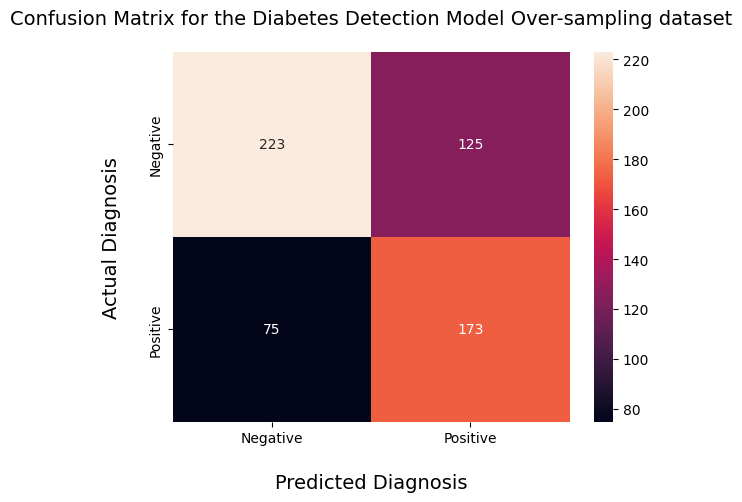

In [30]:
ax = sns.heatmap(conf_matrix_OS, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for the Diabetes Detection Model Over-sampling dataset", fontsize=14, pad=20)

plt.show()

# SVM model and Confusion Matrix (Non sampling)

In [31]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

model = SVC()

all_y_pred_glu_more_100_NS = []
all_y_test_glu_more_100_NS = []

for train_index, test_index in kf.split(X_NS,y_NS):
    X_train, X_test = X_NS[train_index], X_NS[test_index]
    y_train, y_test = y_NS[train_index], y_NS[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    all_y_pred_glu_more_100_NS.append(y_pred)
    all_y_test_glu_more_100_NS.append(y_test)
    

In [32]:
all_y_pred_combine_NS = np.concatenate(all_y_pred_glu_more_100_NS)
all_y_test_combine_NS = np.concatenate(all_y_test_glu_more_100_NS)

In [33]:
print(classification_report(all_y_test_combine_NS,all_y_pred_combine_NS))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       298
           1       0.70      0.50      0.58       233

    accuracy                           0.69       531
   macro avg       0.69      0.67      0.67       531
weighted avg       0.69      0.69      0.68       531



In [34]:
conf_matrix_NS = confusion_matrix(all_y_pred_combine_NS,all_y_test_combine_NS)

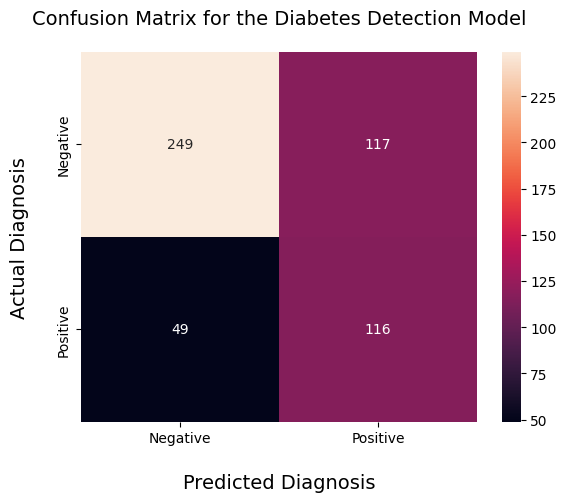

In [35]:
ax = sns.heatmap(conf_matrix_NS, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for the Diabetes Detection Model", fontsize=14, pad=20)

plt.show()

# SVM model and Confusion Matrix (Under sampling-US)

In [36]:
from imblearn.under_sampling import RandomUnderSampler

In [37]:
# 3. Undersampling
ros = RandomUnderSampler(random_state=42)
X_resampled_US, y_resampled_US = ros.fit_resample(X_NS, y_NS)


In [38]:
print("Outcomes 1 : " + str(y_resampled_US.sum()))
print("Outcomes 0 : " + str(len(y_resampled_US) - y_resampled_US.sum()))

Outcomes 1 : 233
Outcomes 0 : 233


In [39]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

model = SVC()

all_y_pred_glu_more_100_US = []
all_y_test_glu_more_100_US = []

for train_index, test_index in kf.split(X_resampled_US, y_resampled_US):
    X_train, X_test = X_resampled_US[train_index], X_resampled_US[test_index]
    y_train, y_test = y_resampled_US[train_index], y_resampled_US[test_index]

    # Train your model on the resampled data
    model = SVC()
    model.fit(X_train, y_train)

    #model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    all_y_pred_glu_more_100_US.append(y_pred)
    all_y_test_glu_more_100_US.append(y_test)


In [40]:
all_y_pred_combine_US = np.concatenate(all_y_pred_glu_more_100_US)
all_y_test_combine_US = np.concatenate(all_y_test_glu_more_100_US)


In [41]:
print(classification_report(all_y_test_combine_US,all_y_pred_combine_US))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69       233
           1       0.70      0.57      0.63       233

    accuracy                           0.66       466
   macro avg       0.67      0.66      0.66       466
weighted avg       0.67      0.66      0.66       466



In [42]:
conf_matrix_US = confusion_matrix(all_y_pred_combine_US,all_y_test_combine_US)

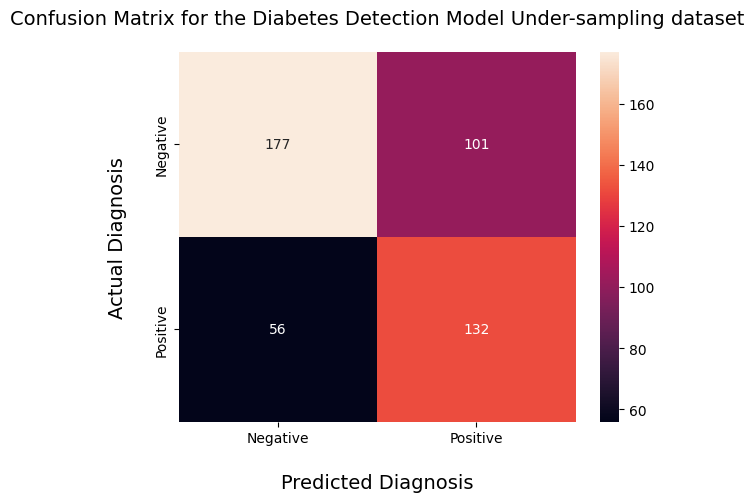

In [46]:
ax = sns.heatmap(conf_matrix_US, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for the Diabetes Detection Model Under-sampling dataset", fontsize=14, pad=20)

plt.show()
